New approach entirely

In [35]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report


In [36]:

IMG_SIZE = 224
BATCH_SIZE = 29

# Data paths
TRAIN_DIR = "../Data/train"
VALID_DIR = "../Data/valid"
TEST_DIR  = "../Data/test"



def load_dataset_from_csv(folder_path):
    df = pd.read_csv(os.path.join(folder_path, "labels.csv"))
    image_paths = [os.path.join(folder_path, fname) for fname in df['filename']]
    labels = df['fallen'].values

    def process_image(path, label):
        image = tf.io.read_file(path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    path_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    image_label_ds = path_ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
    return image_label_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)



In [37]:
train_ds = load_dataset_from_csv(TRAIN_DIR)
valid_ds = load_dataset_from_csv(VALID_DIR)
test_ds  = load_dataset_from_csv(TEST_DIR)


In [38]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])


In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=10)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.6585 - loss: 0.9247 - val_accuracy: 0.7966 - val_loss: 0.5112
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - accuracy: 0.7848 - loss: 0.4911 - val_accuracy: 0.7966 - val_loss: 0.6307
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - accuracy: 0.8138 - loss: 0.4438 - val_accuracy: 0.7627 - val_loss: 0.5025
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.7849 - loss: 0.4580 - val_accuracy: 0.7966 - val_loss: 0.5362
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - accuracy: 0.8281 - loss: 0.4284 - val_accuracy: 0.7966 - val_loss: 0.5312
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.8242 - loss: 0.3819 - val_accuracy: 0.7797 - val_loss: 0.5547
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.8712 - loss: 0.3532 - val_accuracy: 0.7966 - val_loss: 0.6048
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.8543 - loss: 0.3174 - val_accuracy: 0.

In [40]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc:.2%}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8674 - loss: 0.2868
Test Accuracy: 88.14%


In [41]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # 👈 input shape goes here
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=20)


Epoch 1/20


/Users/drapcat/4380env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.6153 - loss: 1.2351 - val_accuracy: 0.7966 - val_loss: 0.5493
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.7398 - loss: 0.5358 - val_accuracy: 0.7966 - val_loss: 0.9426
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.7996 - loss: 0.5101 - val_accuracy: 0.8136 - val_loss: 0.5869
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.8198 - loss: 0.4596 - val_accuracy: 0.7966 - val_loss: 0.7835
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.7766 - loss: 0.4564 - val_accuracy: 0.7966 - val_loss: 0.6392
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - accuracy: 0.8024 - loss: 0.4871 - val_accuracy: 0.8136 - val_loss: 0.6399
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.8364 - loss: 0.4301 - val_accuracy: 0.7966 - val_loss: 0.5875
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.7936 - loss: 0.4227 - val_accuracy: 0.7966 - val_

In [42]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc:.2%}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9102 - loss: 0.3112
Test Accuracy: 91.53%


In [43]:
y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images).flatten()
    preds = (probs > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fallen", "Fallen"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Confusion Matrix:
[[41  3]
 [ 2 13]]

Classification Report:
              precision    recall  f1-score   support

  Not Fallen       0.95      0.93      0.94        44
      Fallen       0.81      0.87      0.84        15

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59



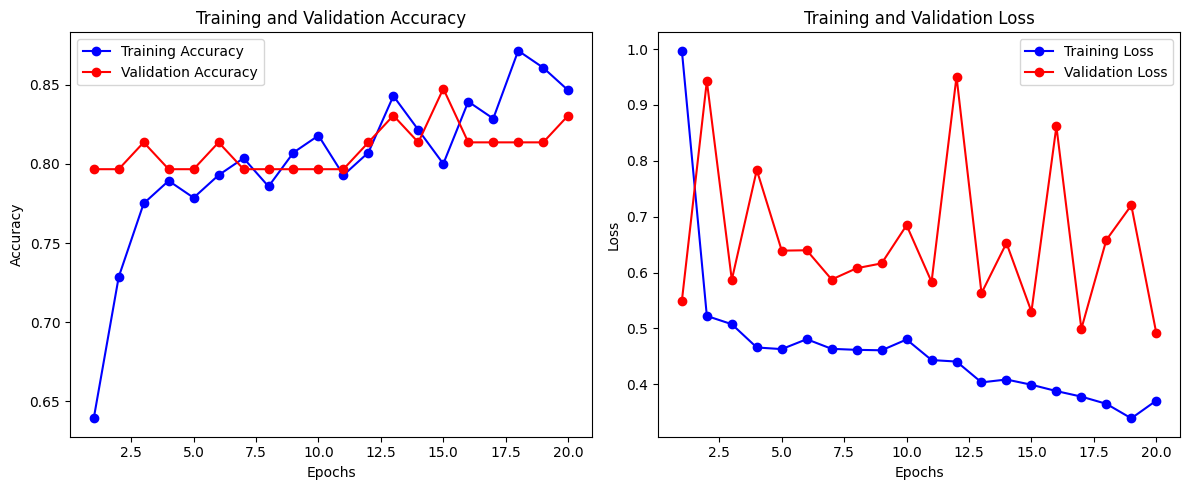

In [44]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
